In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from make_bb import *
from filt_interp import *
from mdwarf_interp import *
from lamb_eff import *
from dcr_offset import *

/Users/Riley/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:479: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:479: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:479: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:479: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:479: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, 

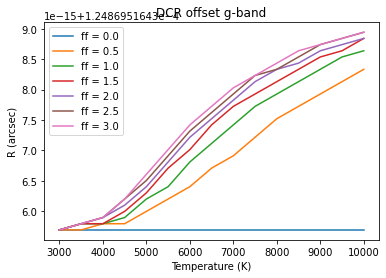

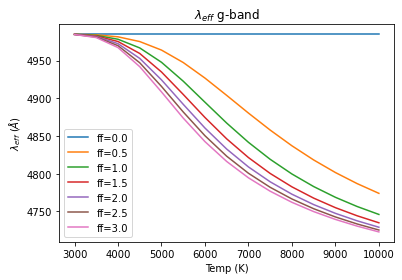

In [2]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

am = 1.1 #airmass
ffs = np.arange(0.0,3.5,0.5)#fraction of normalized BB added to mdwarf spectrum
BBwave = np.arange(0,12000,1)#wavelength array for make_bb
band='g' #LSST bandpass


for ff in ffs:
    Rlist = []
    wefflist = []
    tstep = 500
    temps = np.arange(3000,10000+tstep,tstep)
  
    for t in temps:
        w_eff = lamb_eff(band=band, temp=t, mdname='m5.all.na.k.fits', ff=ff, normT=10000)
        R = dcr_offset(w_eff, airmass = am)
        Rlist.append(R)
        wefflist.append(w_eff)

    ax1.plot(temps, Rlist,label='ff = {}'.format(ff))
    ax1.set_xlabel('Temperature (K)')
    ax1.set_ylabel('R (arcsec)')
    ax1.set_title('DCR offset {}-band'.format(band))
    ax1.legend()

    ax2.plot(temps, wefflist, label='ff={}'.format(ff))
    ax2.set_xlabel('Temp (K)')
    ax2.set_ylabel(r'$\lambda_{eff}$ ($\AA$)')
    ax2.set_title(r'$\lambda_{eff}$'+' {}-band'.format(band))
    ax2.legend()

fig.savefig('Figures/sed_comp.png',dpi=300,bbox_inches='tight')
fig1.savefig('Figures/rplot.png', dpi=300, bbox_inches='tight')
fig2.savefig('Figures/weffplot.png', dpi=300, bbox_inches='tight')